In [1]:
import os 
print(os.getcwd())
print(os.listdir())

c:\AI_project
['.git', '.venv', 'AI_project-1', 'dataset', 'hello.ipynb', 'Practice_CodingTest.ipynb', 'py', 'pythonbasic.ipynb', 'README.md']


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
# Setting random seed for 재현성
random.seed(42)
np.random.seed(42)

In [3]:
# Data
x = np.array([[1],[2],[3],[4],[5]]) # 독립변수
y = np.array([2,4,5,4,5]) # 종속변수

# Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [4]:
# model 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 예측 및 평가
predictions = model.predict(x_test)

In [8]:
# Result
print("Size of train data : ", x_train.shape[0])
print("Size of test data : ", x_test.shape[0])
print("\n모델 계수 : ")
print("Slope : ", model.coef_[0])
print("Intercept : ", model.intercept_)
print("\ntest set 실제값 : ", y_test)
print("test set 예측값 : ", predictions)
print("\n모델 성능 : ")
print("R_square score : ", r2_score(y_test, predictions))
print("평균제곱오차(MSE) : ", mean_squared_error(y_test, predictions))
      

Size of train data :  4
Size of test data :  1

모델 계수 : 
Slope :  0.6857142857142857
Intercept :  1.7714285714285714

test set 실제값 :  [4]
test set 예측값 :  [3.14285714]

모델 성능 : 
R_square score :  nan
평균제곱오차(MSE) :  0.7346938775510206


c:\AI_project\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


#### 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예


In [5]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading data
df = pd.read_csv("dataset/diabetes.csv")

In [7]:
# data 확인
print("* DataSet Size : ", df.shape)
print("\n* First 5 colunm : ")
print(df.head())
print("\n* 기술통계 : ")
print(df.describe())


* DataSet Size :  (768, 9)

* First 5 colunm : 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

* 기술통계 : 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.3695

In [9]:
# 독립변수x와 종속변수y 분리
X = df.drop('Outcome', axis=1) # outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)


In [10]:
# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred)) # 1에 가까울수록 적다
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred)) # 17% 의 오차가 있음 > bad
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred)) # 무려 34%!! > very bad


모델 성능:
R² 점수: 0.25500281176741757
평균 제곱 오차 (MSE): 0.17104527280850101
평균 절대 오차 (MAE): 0.34812825999928226


In [11]:
# 특성 중요도 분석
feature_importance = pd.DataFrame({        # feature : 결과값y를 제외한 나머지
    'feature' : X.columns,
    'importance' : np.abs(model.coef_)     # coef_ : 기울기
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도 : ")
print(feature_importance)


특성 중요도 : 
                    feature  importance
6  DiabetesPedigreeFunction    0.111263
5                       BMI    0.015039
0               Pregnancies    0.010468
7                       Age    0.006460
1                   Glucose    0.005634
2             BloodPressure    0.002281
3             SkinThickness    0.000532
4                   Insulin    0.000278


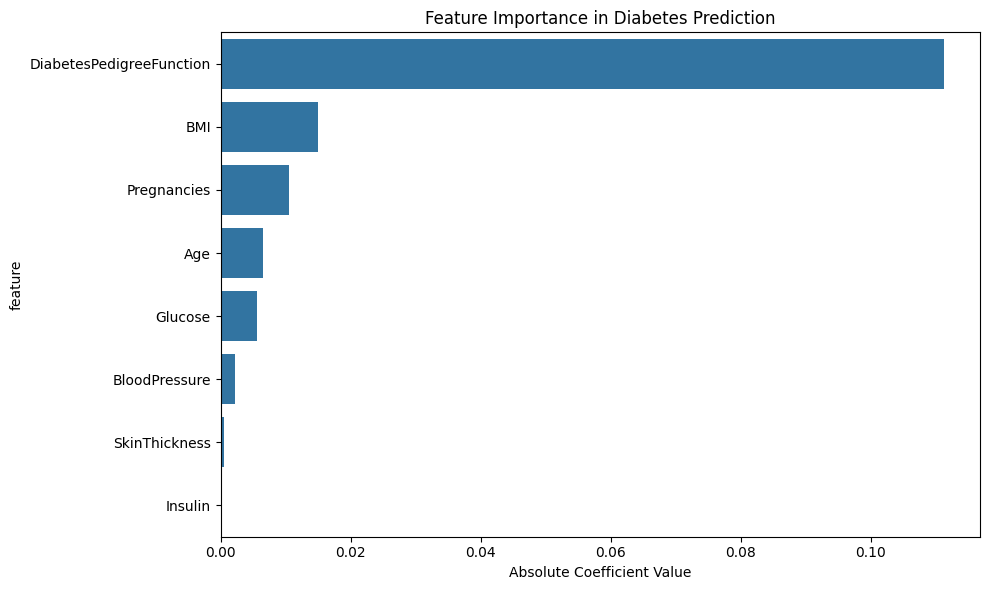

In [12]:
# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()


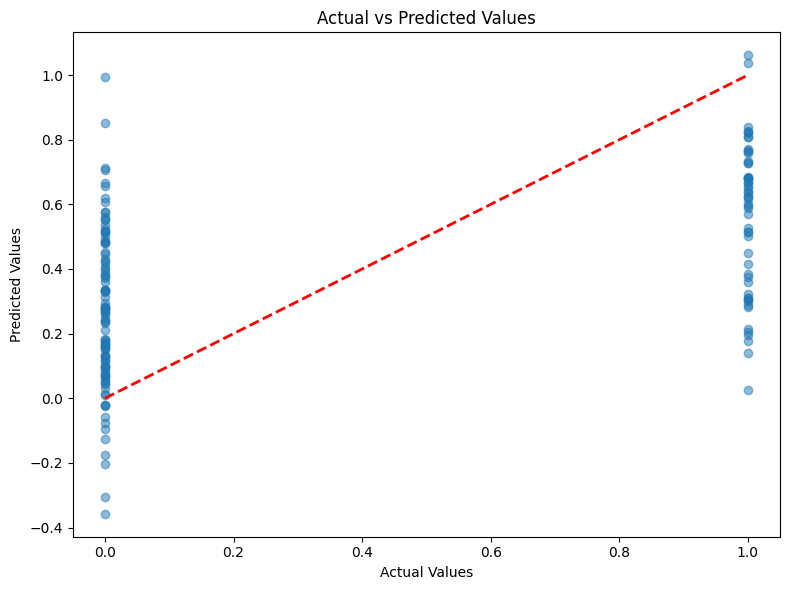

In [13]:
# 시각화: 실제값 vs 예측값

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

#### 다중선형회귀

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

In [16]:
# 입력데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))
y = test_scores

In [17]:
# model 생성/학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
# result
print("* 회귀계수")
print(f"Study hours : {model.coef_[0]:.2f}")
print(f"Tutor hours : {model.coef_[1]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")


* 회귀계수
Study hours : 4.87
Tutor hours : 1.94
Intercept : 53.39


In [22]:
# 새로운 데이터로 예측
new_student = np.array([[6,2]]) # study:6, tutor:2
prediction = model.predict(new_student)
print(f"\n예측점수 : {prediction[0]:.1f}")


예측점수 : 86.5


In [23]:
# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared : {r_squared:.4f}")

R-squared : 0.9613


#### font

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [37]:
# font 설정
font_path = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
pd.options.display.float_format = '{:.2f}'.format # 지수 표현식 방지

In [34]:
# 데이터 생성
np.random.seed(42)
n_samples = 100

In [38]:
# 독립변수
X1 = np.random.normal(0,1,n_samples)
X2 = np.random.normal(0,1,n_samples)
X3 = np.random.normal(0,1,n_samples)

# 종속변수
Y = 2*X1 + 3*X2 + 1.5*X3 + np.random.normal(0,1,n_samples)

In [39]:
# DataFrame
data = pd.DataFrame({
    'X1' : X1, 
    'X2' : X2,
    'X3' : X3,
    'Y' : Y
})

In [40]:
# train, test data 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# prediction
y_pred = model.predict(X_test)

In [46]:
# result
print("* 회귀계수")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature} : {coef: .4f}")
print(f"\n* Intercept : {model.intercept_:.4f}")
print(f"\n* R-squared : {r2_score(y_test, y_pred):.4f}")
print(f"\n* 평균제곱근 오차(RMSE) : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


* 회귀계수
  X1 :  1.7882
  X2 :  2.9284
  X3 :  1.5135

* Intercept : 0.1535

* R-squared : 0.9566

* 평균제곱근 오차(RMSE) : 0.7174


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

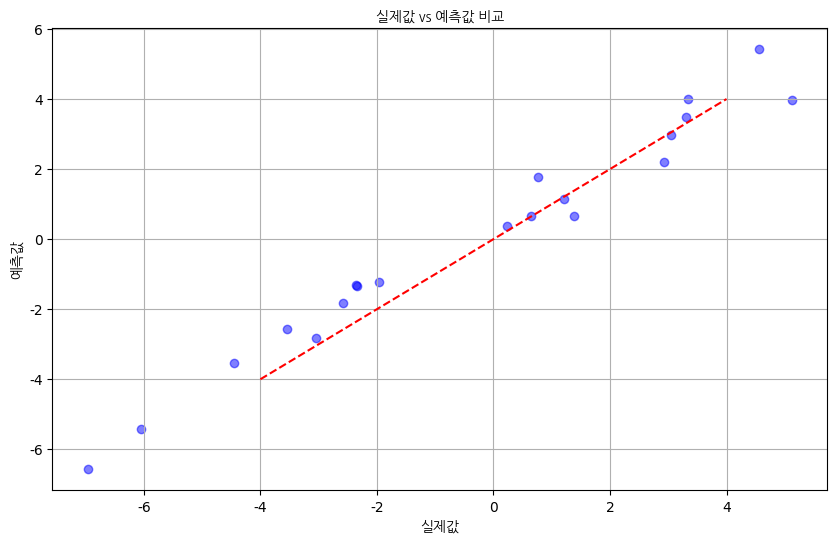

In [48]:
# 실제값과 예측값 비교 시각화
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')  # 대각선
plt.xlabel('실제값', fontproperties=fontprop)
plt.ylabel('예측값', fontproperties=fontprop)
plt.title('실제값 vs 예측값 비교', fontproperties=fontprop)
plt.grid(True)
plt.show()

In [49]:
# new_data 예측
new_data = np.array([[0.5,1.0,-0.5]])
prediction = model.predict(new_data)
print(f"\nnew data 예측값 : {prediction[0]:.4f}")


new data 예측값 : 3.2192


c:\AI_project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 선형회귀 추가학습